# **This notebook contains the Linear Regression model**

# connect database and create dataframe

In [ ]:
!pip uninstall pymongo
!pip install pymongo[srv]

Found existing installation: pymongo 4.1.0
Uninstalling pymongo-4.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/bson/*
    /usr/local/lib/python3.7/dist-packages/gridfs/*
    /usr/local/lib/python3.7/dist-packages/pymongo-4.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pymongo/*
Proceed (y/n)? y
  Successfully uninstalled pymongo-4.1.0
  Using cached pymongo-4.1.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (462 kB)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [ ]:
import pymongo as pym
import pandas as pd
from sklearn.model_selection import train_test_split

client = pym.MongoClient('MONGO_URI') #connect database
client.test

Database(MongoClient(host=['ffs-shard-00-01.7lqnp.mongodb.net:27017', 'ffs-shard-00-02.7lqnp.mongodb.net:27017', 'ffs-shard-00-00.7lqnp.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, retrywrites=True, w='majority', authsource='admin', replicaset='atlas-r74xj9-shard-0', tls=True), 'test')

In [ ]:
db = client.FFSML
collection = db.ML_Data

df = pd.DataFrame(list(collection.find()))

df.drop(columns=['_id'],inplace=True) #drop _id column

col_names = ['year','month','day','attaragalla_rf','galgamuwa_rf','mediyawa_rf','mahagalkadawala_rf','streamflow']
df.columns = col_names

df.head()

,year,month,day,attaragalla_rf,galgamuwa_rf,mediyawa_rf,mahagalkadawala_rf,streamflow
0,2016,1,20,0.0,0.0,0.0,0.0,1.165105
1,2016,2,4,0.0,0.0,0.0,0.0,0.971200
2,2016,1,11,0.0,0.0,0.0,0.0,1.835221
3,2016,1,7,0.0,0.0,4.1,0.0,3.081524
4,2016,2,16,0.0,0.0,0.0,0.0,1.597633


## Data Splitting

In [ ]:
#drop year month date columns
df.drop(columns=['year','month','day'],inplace=True)

X = df
Y = df.pop('streamflow')

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.describe()

,attaragalla_rf,galgamuwa_rf,mediyawa_rf,mahagalkadawala_rf
count,1168.000000,1168.000000,1168.000000,1168.000000
mean,2.696896,3.851113,4.166952,3.424914
std,9.618427,12.111410,12.414237,10.821397
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.350000,0.000000
max,97.500000,136.300000,118.000000,100.500000


### Normalizing

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

In [ ]:
model = tf.keras.models.Sequential([normalizer,layers.Dense(units=1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 14
Trainable params: 5
Non-trainable params: 9
_________________________________________________________________


In [ ]:
model.compile(optimizer= tf.optimizers.Adam(learning_rate=0.1),loss=keras.losses.MeanAbsoluteError())

In [ ]:
history = model.fit(X_train,Y_train,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
30/30 [==============================] - 1s 7ms/step - loss: 0.9325 - val_loss: 1.7338
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8938 - val_loss: 1.7189
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8791 - val_loss: 1.7452
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8950 - val_loss: 1.7260
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.9005 - val_loss: 1.7134
Epoch 6/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8966 - val_loss: 1.7313
Epoch 7/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8859 - val_loss: 1.7175
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8823 - val_loss: 1.7102
Epoch 9/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8834 - val_loss: 1.7202
Epoch 10/50
30/30 [==============================] - 0s 3ms/step - loss: 0.8853 - val_loss: 1.7303
Epoch 11/50
30/30 [

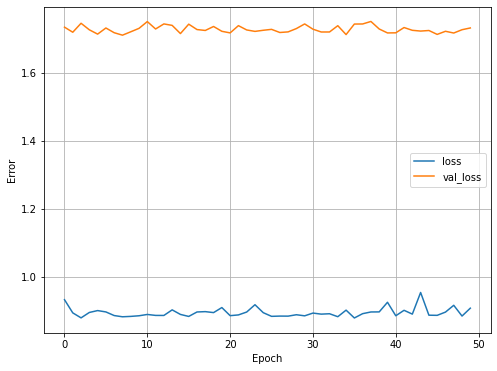

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [ ]:
model.evaluate(X_test,Y_test,verbose=1)

10/10 [==============================] - 0s 2ms/step - loss: 0.9711


0.971122145652771